# Unconstrained Optimization Examples

In this notebook, we will look at several unconstrained optimization examples to see the application of theory in action. These examples demonstrate both the first and second order necessary conditions as well as the second order sufficient conditions.

First, look at the contours of the following objective functions. Note that this script demonstrates the use of function handles within python. You can pass functions as arguments so the same code can be re-used to generate the contour plots.

Some of these functions have minima, some have maxima, others have saddle points and others are unbounded without either minima or maxima.

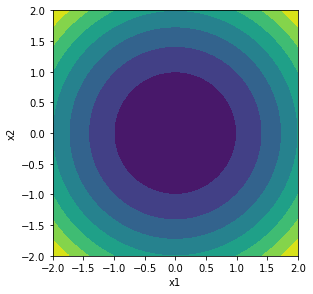

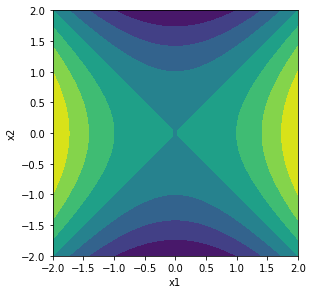

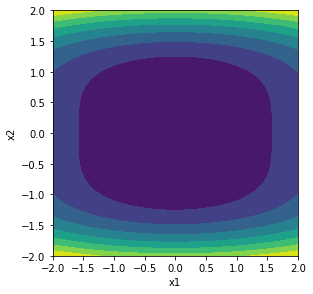

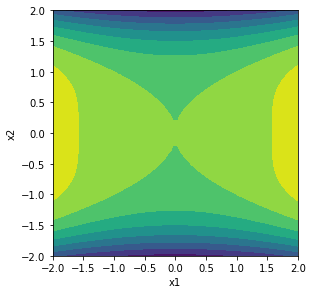

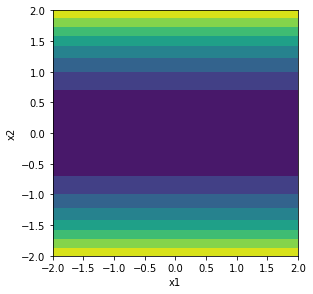

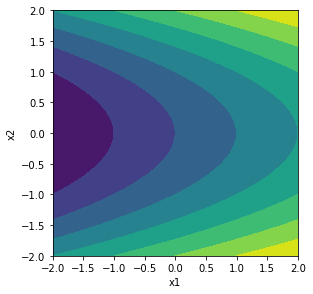

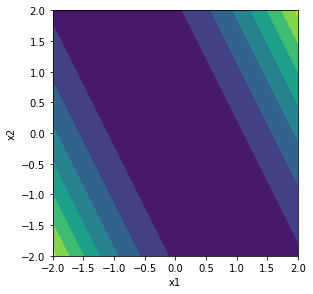

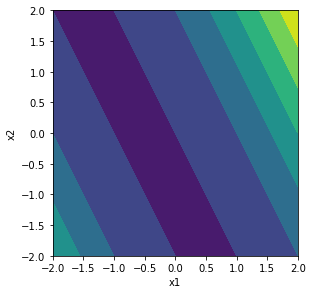

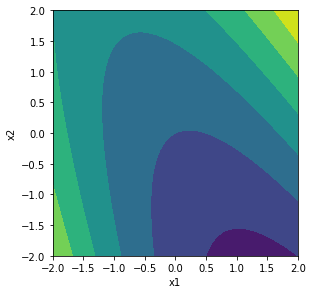

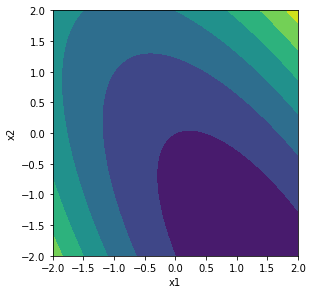

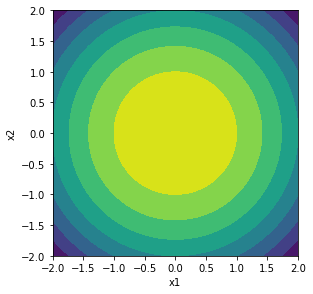

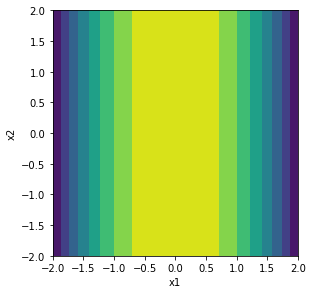

In [2]:
import numpy as np
import matplotlib.pylab as plt

def contour_plot(fobj):
    # Generate the data for a contour plot
    n = 50
    x1 = np.linspace(-2, 2, n)
    x2 = np.linspace(-2, 2, n)
    X1, X2 = np.meshgrid(x1, x2)
    f = np.zeros((n, n))

    # Query the function at the specified locations
    for i in range(n):
        for j in range(n):
            f[i, j] = fobj([X1[i, j], X2[i, j]])

    fig, ax = plt.subplots(1, 1)
    ax.contourf(X1, X2, f)
    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    return

def f1(x):
    return x[0]**2 + x[1]**2

def f2(x):
    return x[0]**2 - x[1]**2

def f3(x):
    return x[0]**2 + x[1]**4

def f4(x):
    return x[0]**2 - x[1]**4

def f5(x):
    return x[1]**2

def f6(x):
    return x[0] + x[1]**2

def f7(x):
    return 2*x[0]**2 + 2*x[0]*x[1] + 0.5*x[1]**2

def f8(x):
    return 2*x[0]**2 + 2*x[0]*x[1] + 0.5*x[1]**2 + 2*x[0] + x[1]

def f9(x):
    return 2*x[0]**2 + 2*x[0]*x[1] + 0.5*x[1]**2 - x[0] + 2*x[1]

def f10(x):
    return 2*x[0]**2 + 2*x[0]*x[1] + x[1]**2 - x[0] + 2*x[1]

def f11(x):
    return -x[0]**2 -x[1]**2

def f12(x):
    return -x[0]**2

funcs = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12]

for fobj in funcs:
    contour_plot(fobj)
    
plt.show()

To test the first and second order necessary conditions and the second order sufficient conditions, we need to compute the gradient and Hessian of the function of interest. Here we will use finite-different methods to compute approximations. This is not advisable for these simple functions since numerical errors enter and the gradient and Hessian approximations. 

In [7]:
def approx_gradient(x, fobj, h=1e-6):
    '''Approximate the gradient using central difference'''
    x = np.array(x)
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    g = np.array([0.5*(fobj(x + h*e1) - fobj(x - h*e1))/h,
                  0.5*(fobj(x + h*e2) - fobj(x - h*e2))/h])
    return g

def approx_hessian(x, fobj, h=1e-6):
    '''Approximate the Hessian'''
    x = np.array(x)
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    H = np.array([[(fobj(x + h*e1) - 2*fobj(x) + fobj(x - h*e1))/h**2,
                   0.25*(fobj(x + h*(e1 + e2)) -
                         fobj(x + h*(e1 - e2)) -
                         fobj(x + h*(e2 - e1)) + 
                         fobj(x + h*(e1 + e2)))/h**2],
                  [0, (fobj(x + h*e2) - 2*fobj(x) + fobj(x - h*e2))/h**2]])
    H[1,0] = H[0,1]
    return H

x0 = [0, 0]
for fobj in funcs:
    g = approx_gradient(x0, fobj)
    
    if np.sqrt(np.dot(g, g)) < 1e-4:
        print('First-order necessary condition satisfied for ', fobj)
        
        H = approx_hessian(x0, fobj)
        eig, Q = np.linalg.eigh(H)
        
        print('Eigenvalues: ', eig)
        if eig[0] > 1e-4:
            print('Second order sufficient conditions satisfied for ', fobj)
        elif eig[0] < -1e-4:
            print('Second order sufficient conditions violated for ', fobj)
        else:
            print('Indefinite or numerical problems? ', eig[0])
    else:
        print('First-order necessary condition *violated* for ', fobj)

First-order necessary condition satisfied for  <function f1 at 0x10b44fa60>
Eigenvalues:  [2. 2.]
Second order sufficient conditions satisfied for  <function f1 at 0x10b44fa60>
First-order necessary condition satisfied for  <function f2 at 0x10cfb8158>
Eigenvalues:  [-2.  2.]
Second order sufficient conditions violated for  <function f2 at 0x10cfb8158>
First-order necessary condition satisfied for  <function f3 at 0x10cfb8268>
Eigenvalues:  [2.e-12 2.e+00]
Indefinite or numerical problems?  1.9999999999999996e-12
First-order necessary condition satisfied for  <function f4 at 0x10cfb81e0>
Eigenvalues:  [-2.e-12  2.e+00]
Indefinite or numerical problems?  -1.9999999999999996e-12
First-order necessary condition satisfied for  <function f5 at 0x10cfb82f0>
Eigenvalues:  [0. 2.]
Indefinite or numerical problems?  0.0
First-order necessary condition *violated* for  <function f6 at 0x10cfb8620>
First-order necessary condition satisfied for  <function f7 at 0x10cfb8488>
Eigenvalues:  [0. 5.]
In